# ML Workflow - Feature Selection & Engineering

![Image](./img/scikit_learn.png)

In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

from sklearn import datasets, ensemble
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

## Feature Selection

- Improve the accuracy with which the model is able to predict for new data.

- Reduce computational cost.

- Produce a more interpretable model.

![Image](./img/feature_selection.jpg)

---

### Manual feature selection

- data analysis
- intuition
- domain knowledge

In [2]:
# Diabetes dataset

diabetes = datasets.load_diabetes(as_frame=True)
description = diabetes.DESCR

diabetes = diabetes['data'].merge(diabetes['target'], left_index=True, right_index=True)
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [5]:
print(description)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [11]:
# Vehicles dataset

vehicles = pd.read_csv('datasets/vehicles.csv')
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [13]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

In [14]:
vehicles.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


---

### Manual feature selection - [Correlation](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/)

A correlation coefficient measures the extent to which two variables tend to change together. The coefficient describes both the strength and the direction of the relationship.

__Pearson:__ The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.

__Spearman:__ The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate.

We will use [`pandas.Series.corr`](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html) and [`pandas.DataFrame.corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

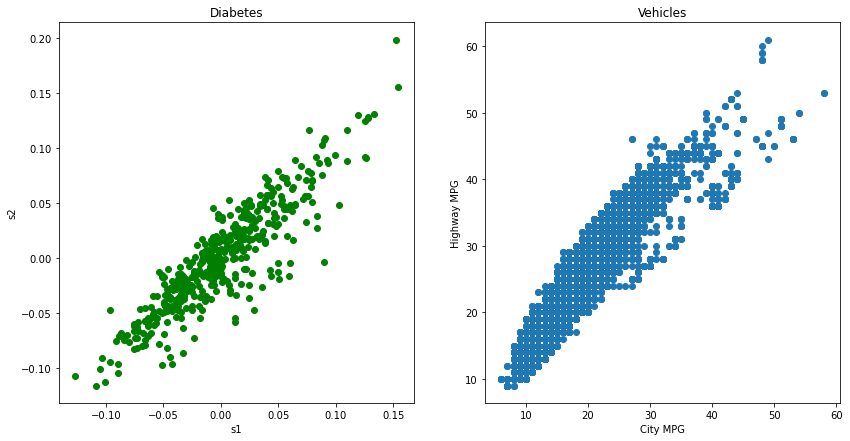

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,7))
axs[0].scatter(diabetes['s1'], diabetes['s2'], c='green')
axs[0].set(xlabel='s1', ylabel='s2', title='Diabetes')
axs[1].scatter(vehicles['City MPG'], vehicles['Highway MPG'])
axs[1].set(xlabel='City MPG', ylabel='Highway MPG', title='Vehicles');

In [16]:
# Pearson

print(vehicles['City MPG'].corr(vehicles['Highway MPG'], method='pearson'))
print(diabetes['s1'].corr(diabetes['s2'], method='pearson'))

0.9238555885288396
0.8966629578104902


In [17]:
# Spearman

print(vehicles['City MPG'].corr(vehicles['Highway MPG'], method='spearman'))
print(diabetes['s1'].corr(diabetes['s2'], method='spearman'))

0.9301202474568572
0.8787928615260836


In [18]:
diabetes_correlation = diabetes.corr()
diabetes_correlation

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


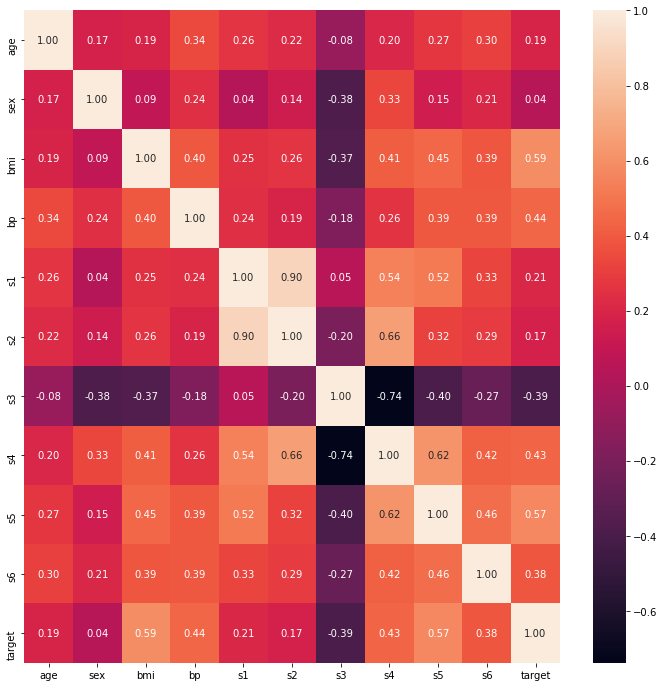

In [19]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(diabetes.corr(method='pearson'), annot=True, fmt='.2f', ax=ax);

In [20]:
vehicles_correlation = vehicles.corr()
vehicles_correlation

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


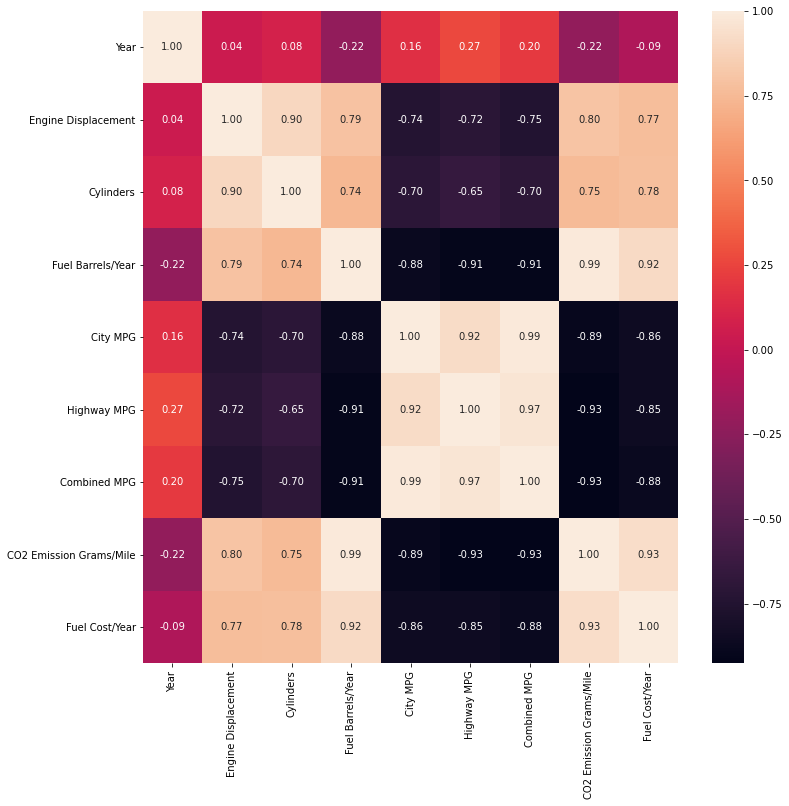

In [21]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(vehicles.corr(method='pearson'), annot=True, fmt='.2f', ax=ax);

__We may want to remove a feature from the training phase because:__

- A feature that is highly correlated with another feature in the data set. If this is the case then both features are in essence providing the same information. Some algorithms are sensitive to correlated features.

- Features that provide little to no information. An example would be a feature where most examples have the same value.

- Features that have little to no statistical relationship with the target variable.

---

### Automated feature selection - [Variance threshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)

This method takes a threshold value and when fitted to a feature set will remove any features below this threshold. The default value for the threshold is 0 and this will remove any features with zero variance, or in other words where all values are the same.

In [22]:
# Diabetes dataset

X = diabetes.drop('target', axis=1)
y = diabetes['target']

selector = VarianceThreshold(threshold=0.0)
print("Original feature shape:", X.shape)

new_X = selector.fit_transform(X)
print("Transformed feature shape:", new_X.shape)

# Selected features
print("Selected features:", selector.get_feature_names_out())

Original feature shape: (442, 10)
Transformed feature shape: (442, 10)
Selected features: ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']


In [24]:
# Vehicles dataset

X = vehicles[['Engine Displacement', 
              'Cylinders', 
              'Fuel Barrels/Year', 
              'City MPG', 
              'Highway MPG', 
              'Combined MPG', 
              'CO2 Emission Grams/Mile']]
y = vehicles['Fuel Cost/Year']

selector = VarianceThreshold(threshold=5)
print("Original feature shape:", X.shape)

new_X = selector.fit_transform(X)
print("Transformed feature shape:", new_X.shape)

# Selected features
print("Selected features:", selector.get_feature_names_out())

Original feature shape: (35952, 7)
Transformed feature shape: (35952, 5)
Selected features: ['Fuel Barrels/Year' 'City MPG' 'Highway MPG' 'Combined MPG'
 'CO2 Emission Grams/Mile']


In [25]:
#Breast cancer dataset

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer['data']
y = breast_cancer['target']

selector = VarianceThreshold(threshold=0.5)
print("Original feature shape:", X.shape)

new_X = selector.fit_transform(X)
print("Transformed feature shape:", new_X.shape)

# Selected features
print("Selected features:", selector.get_feature_names_out())

Original feature shape: (569, 30)
Transformed feature shape: (569, 10)
Selected features: ['x0' 'x1' 'x2' 'x3' 'x12' 'x13' 'x20' 'x21' 'x22' 'x23']


---

### Automated feature selection - [Univariate feature selection](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php)

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other. Specifically, it tests the null hypothesis:

![Image](./img/anova.JPG)

where µ = group mean and k = number of groups. If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.

[Here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) you may find the scikit-learn implementation.

In [26]:
# Diabetes dataset

X = diabetes.drop('target', axis=1)
y = diabetes['target']

selector = SelectKBest(score_func=f_regression, k='all')
print("Original feature shape:", X.shape)

new_X = selector.fit_transform(X, y)
print("Transformed feature shape:", new_X.shape)

Original feature shape: (442, 10)
Transformed feature shape: (442, 10)


In [27]:
# Vehicles dataset

X = vehicles[['Engine Displacement', 
              'Cylinders', 
              'Fuel Barrels/Year', 
              'City MPG', 
              'Highway MPG', 
              'Combined MPG', 
              'CO2 Emission Grams/Mile']]
y = vehicles['Fuel Cost/Year']

selector = SelectKBest(score_func=f_regression, k='all')
print("Original feature shape:", X.shape)

new_X = selector.fit_transform(X, y)
print("Transformed feature shape:", new_X.shape)

Original feature shape: (35952, 7)
Transformed feature shape: (35952, 7)


In [28]:
#Breast cancer dataset

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer['data']
y = breast_cancer['target']

selector = SelectKBest()
print("Original feature shape:", X.shape)

new_X = selector.fit_transform(X, y)
print("Transformed feature shape:", new_X.shape)

Original feature shape: (569, 30)
Transformed feature shape: (569, 10)


---

## Feature Engineering

- Manual

- Automated (e.g.: [Featuretools](https://www.featuretools.com/))

![Image](./img/feature_engineering.jpg)

There are two main reasons:

- __The information contained within the feature is stronger if the data is aggregated or represented in a different way__. An example here might be a feature containing the age of a person, aggregating the ages into buckets or bins may better represent the relationship to the target.

- __A feature on its own does not have a strong enough statistical relationship with the target but when combined with another feature has a meaningful relationship__. Let’s say we have a data set that has a number of features based on credit history for a group of customers and a target that denotes if they have defaulted on a loan. Suppose we have a loan amount and a salary value. If we combined these into a new feature called “loan to salary ratio” this may give more or better information than those features alone.

### Manual feature engineering

- Binning

- Extracting date

In [29]:
# Numerical binning

vehicles['num_bin'] = pd.cut(vehicles['Fuel Cost/Year'], bins=3, labels=["Low", "Mid", "High"])
vehicles['num_bin'].unique()

['Low', 'Mid', 'High']
Categories (3, object): ['Low' < 'Mid' < 'High']

In [30]:
# Categorical binning

vehicles['Drivetrain'].unique()

array(['2-Wheel Drive', 'Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', 'All-Wheel Drive', '4-Wheel Drive',
       'Part-time 4-Wheel Drive', '2-Wheel Drive, Front'], dtype=object)

In [31]:
def cat_bin(x):
    if '4' in x:
        return '4x4'
    else:
        return '4x2'

In [32]:
vehicles['cat_bin'] = vehicles['Drivetrain'].apply(cat_bin)
vehicles['cat_bin'].unique()

array(['4x2', '4x4'], dtype=object)

In [37]:
# Extracting date

data = pd.DataFrame({'date':['01-01-2022',
                             '10-01-2019',
                             '13-08-2002',
                             '28-09-1995',
                             '13-01-1981']})

data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")
data['date']

0   2022-01-01
1   2019-01-10
2   2002-08-13
3   1995-09-28
4   1981-01-13
Name: date, dtype: datetime64[ns]

In [35]:
#Extracting Year
data['year'] = data['date'].dt.year

#Extracting Month
data['month'] = data['date'].dt.month

#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()

In [36]:
data

,date,year,month,passed_years,passed_months,day_name
0,2022-01-01,2022,1,0,2,Saturday
1,2019-01-10,2019,1,3,38,Thursday
2,2002-08-13,2002,8,20,235,Tuesday
3,1995-09-28,1995,9,27,318,Thursday
4,1981-01-13,1981,1,41,494,Tuesday


---